# Example to Open, Slice and Plot Anomaly and Climatology Maps

## Configuration

In [1]:
from spy4cast import Dataset

dataset_folder = "datasets"  # Folder where the datasets are stored.
dataset_filename = "HadISST_sst-1970_2020.nc"  # File format must be netcdf4.
ds = Dataset(dataset_filename, folder=dataset_folder)
# A chunks keyword argument can be provided in this step. This value will be
# stored internally and passed to in the opening step to use dask chunks.

In [2]:
ds.open("sst")  # Opens the dataset, stores variables.

In [3]:
from spy4cast import Region, Month

region = Region(
    lat0=5, latf=45,
    lon0=-90, lonf=-5,
    month0=Month.JUN, monthf=Month.JUL,
    year0=1997, yearf=2019,
)  # months can also be stated through integers.
ds.slice(region)  # year0 and yearf apply to monthf.
# ds.slice(region, skip=1)  # skip 1 data point in lat and lon dimension.

[INFO] Saving plot with path ./plots-Climatology_Anomaly_EquatorialAtlantic/clim_map.png
[INFO] Saving plot with path ./plots-Climatology_Anomaly_EquatorialAtlantic/anom_map.png
[INFO] Saving Anom data in `data-Climatology_Anomaly_EquatorialAtlantic/anom_map_*.npy`
[INFO] Loading Anom data from `data-Climatology_Anomaly_EquatorialAtlantic/anom_map_*` took 0.003 seconds


[WARNING] Creating path data-Climatology_Anomaly_EquatorialAtlantic/ that did not exist


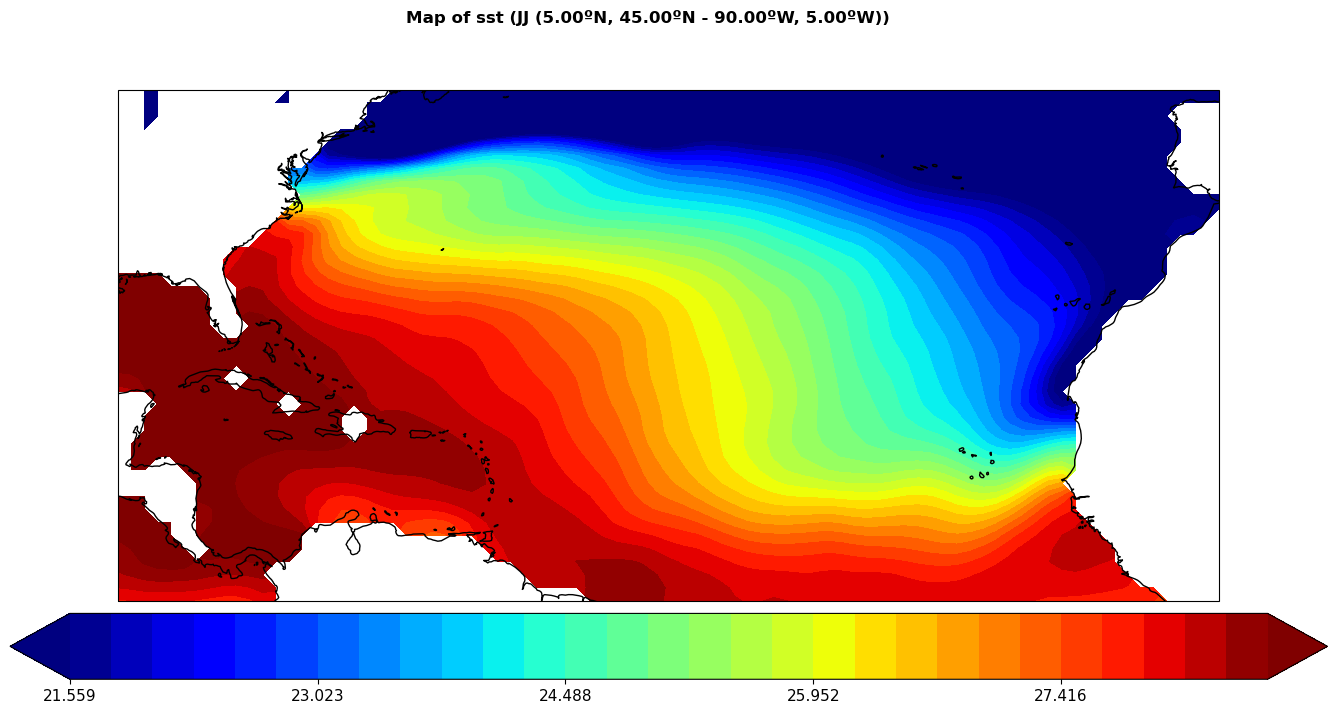

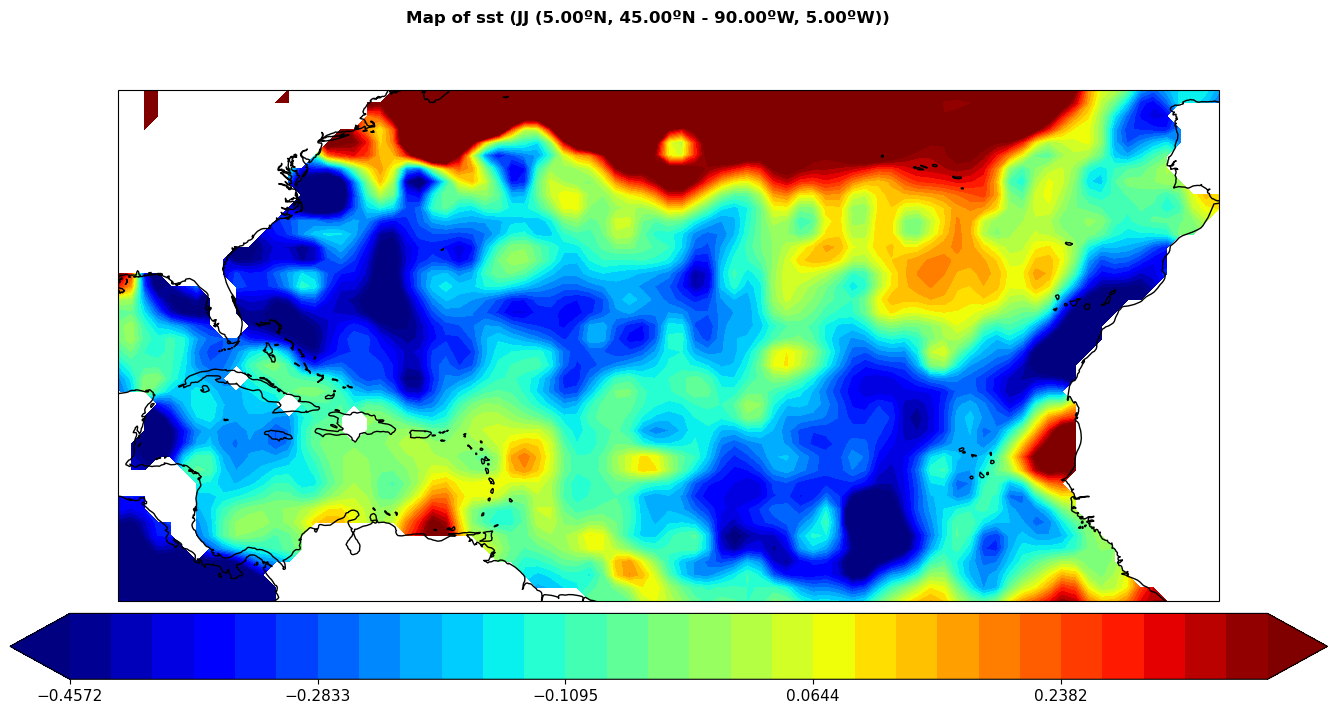

In [4]:
from spy4cast.meteo import Clim, Anom

# Climatology maps and time series.
clim_map = Clim(ds, "map")  # Mean in the time dimension.
clim_ts = Clim(ds, "ts")  # Mean in the lat and lon dimension.
# Anomaly maps and time series
anom_map = Anom(ds, "map")  # An anomaly map for each year
anom_ts = Anom(ds, "ts")  # Mean in the lat and lon dimension
# Plot with the .plot method (look at docs). Example:
clim_map.plot(show_plot=True, save_fig=True, name="plots-Climatology_Anomaly_EquatorialAtlantic/clim_map.png")
anom_map.plot(year=1999, show_plot=True, save_fig=True, name="plots-Climatology_Anomaly_EquatorialAtlantic/anom_map.png")
# Save the data with the .save method (look at docs). Example:
anom_map.save("anom_map_", folder="data-Climatology_Anomaly_EquatorialAtlantic/")
# Load previously saved data with the .load method (look at docs). Example:
anom_map = Anom.load("anom_map_", folder="data-Climatology_Anomaly_EquatorialAtlantic/", type="map")